![Trending Images](https://www.seoclerk.com/pics/want55859-1gron61509206932.jpg)

# Trending YouTube Video Statistics and Comments
## [Линк към Kaggle](https://www.kaggle.com/datasnaek/youtube)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
import warnings

warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')
pd.options.display.max_rows = 15
sns.set()

%matplotlib inline

## Нека заредим данните и видим какво ни е дадено

In [41]:
videos = pd.read_csv('data/USvideos.csv', error_bad_lines=False)
videos

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09
5,cMKX2tE5Luk,The Disaster Artist | Official Trailer HD | A24,A24,1,a24|a24 films|a24 trailers|independent films|t...,1311445,34507,544,3040,https://i.ytimg.com/vi/cMKX2tE5Luk/default.jpg,13.09
6,8wNr-NQImFg,"The Check In: HUD, Ben Carson and Hurricanes",Late Night with Seth Meyers,23,Late night|Seth Meyers|check in|hud|Ben Carson...,666169,9985,297,1071,https://i.ytimg.com/vi/8wNr-NQImFg/default.jpg,13.09
...,...,...,...,...,...,...,...,...,...,...,...
7985,CN4YL1KPDAA,Pixel 2 Classic Unboxing,Linus Tech Tips,28,[none],484376,18242,797,1540,https://i.ytimg.com/vi/CN4YL1KPDAA/default.jpg,22.10
7986,4kmSATD25iY,Pumpkin Spice Oreo Taste Test!,iJustine,22,ijustine|pumpkin spice oreo|taste test|itsmeje...,164625,6688,383,1610,https://i.ytimg.com/vi/4kmSATD25iY/default.jpg,22.10


## Колоните video_id и thumbnail_link не ни носят никаква стойност, затова ще ги изтрием

In [42]:
del videos['video_id']
del videos['thumbnail_link']

## Да видим с какви данни разполагаме

In [43]:
videos.describe()

,category_id,views,likes,dislikes,comment_total,date
count,7992.000000,7.992000e+03,7.992000e+03,7992.000000,7992.000000,7992.000000
mean,20.217718,9.390269e+05,3.449193e+04,1781.625000,4608.489740,16.094249
std,7.415525,2.148263e+06,9.136160e+04,10822.103125,20252.758016,7.677674
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.100000
25%,17.000000,9.686375e+04,1.907500e+03,67.000000,286.000000,11.100000
50%,23.000000,3.086115e+05,8.652500e+03,272.500000,1085.500000,16.595000
75%,25.000000,9.588758e+05,3.021350e+04,1013.000000,3462.750000,21.100000
max,43.000000,4.150067e+07,2.010366e+06,318404.000000,736179.000000,30.090000


In [44]:
videos.isnull().sum().sort_values()

title            0
channel_title    0
category_id      0
tags             0
views            0
likes            0
dislikes         0
comment_total    0
date             0
dtype: int64

## Всички колони са валидни и попълнени, можем да пуснем baseline модел

## Baseline Model

### За целта ще използвам колоната *views* за *y* и модела ще трябва да познава колко гледания има дадено видео.

### За сега ще използваме само колоните с числова стойност. 

In [45]:
X = videos[['category_id', 'likes', 'dislikes', 'comment_total']]
y = videos['views']

print(X)
print(y)

      category_id   likes  dislikes  comment_total
0              24  320053      5931          46245
1              28  185853     26679              0
2              22  576597     39774         170708
3              28   24975      4542          12829
4              23   96666       568           6666
5               1   34507       544           3040
6              23    9985       297           1071
...           ...     ...       ...            ...
7985           28   18242       797           1540
7986           22    6688       383           1610
7987           27   14362       390           1575
7988           25    1265       760           1873
7989           10    7088        68            437
7990           24    2148        77              0
7991           28    1574        59              0

[7992 rows x 4 columns]
0       4394029
1       7860119
2       5845909
3       2642103
4       1168130
5       1311445
6        666169
         ...   
7985     484376
7986     164625

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Да изпробваме няколко алгоритъма и да видим кой се справя най-добре

### Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print("Linear Regression train score:", model.score(X_train, y_train))
print("Linear Regression test score: ", model.score(X_test, y_test))

Linear Regression train score: 0.730928079438
Linear Regression test score:  0.651118174035


### Резултата изглежда ок, да пробваме регуляризация

### Ridge

In [48]:
from sklearn.linear_model import Ridge

alpha = [0.01, 0.1, 1, 10, 100]

for a in alpha:
    print('alpha:', a)
    model = Ridge(alpha = a).fit(X_train, y_train)
    print("Linear Regression train score:", model.score(X_train, y_train))
    print("Linear Regression test score: ", model.score(X_test, y_test))
    print()

alpha: 0.01
Linear Regression train score: 0.730928079438
Linear Regression test score:  0.651118174039

alpha: 0.1
Linear Regression train score: 0.730928079438
Linear Regression test score:  0.651118174082

alpha: 1
Linear Regression train score: 0.730928079438
Linear Regression test score:  0.651118174508

alpha: 10
Linear Regression train score: 0.730928079438
Linear Regression test score:  0.651118178764

alpha: 100
Linear Regression train score: 0.730928079432
Linear Regression test score:  0.651118221306



### Lasso

In [49]:
from sklearn.linear_model import Lasso

alpha = [0.01, 0.1, 1, 10, 100]

for a in alpha:
    print('alpha:', a)
    model = Lasso(alpha = a).fit(X_train, y_train)
    print("Lasso train score:", model.score(X_train, y_train))
    print("Lasso test score: ", model.score(X_test, y_test))
    print()

alpha: 0.01
Lasso train score: 0.730928079438
Lasso test score:  0.651118174046

alpha: 0.1
Lasso train score: 0.730928079438
Lasso test score:  0.651118174145

alpha: 1
Lasso train score: 0.730928079438
Lasso test score:  0.651118175141

alpha: 10
Lasso train score: 0.730928079438
Lasso test score:  0.651118185101

alpha: 100
Lasso train score: 0.730928079401
Lasso test score:  0.651118284659



## Регуляризацията не промени резултата, но все пак е добро начало.

# Да разгледаме колоните по-сериозно

# Числови колони

## Views
Все пак това е най-важната колона за нас. Да видим с какво разполагаме

0       4394029
1       7860119
2       5845909
3       2642103
4       1168130
5       1311445
6        666169
         ...   
7985     484376
7986     164625
7987     440393
7988      55762
7989     142908
7990      24532
7991     144039
Name: views, Length: 7992, dtype: int64
-----------------------
-----------------------
count    7.992000e+03
mean     9.390269e+05
std      2.148263e+06
min      0.000000e+00
25%      9.686375e+04
50%      3.086115e+05
75%      9.588758e+05
max      4.150067e+07
Name: views, dtype: float64


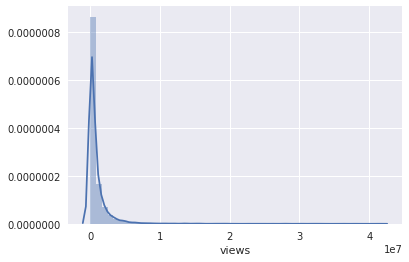

In [50]:
views = videos.views

def printCol(col):
    print(col)
    print("-----------------------")
    print("-----------------------")
    print(col.describe())
    
printCol(views)

sns.distplot(views);

### Само видеата под 1000000 гледания:

6       666169
10      859289
11      452477
12      258781
13      274358
14      473691
15      514972
         ...  
7985    484376
7986    164625
7987    440393
7988     55762
7989    142908
7990     24532
7991    144039
Name: views, Length: 6058, dtype: int64
-----------------------
-----------------------
count      6058.000000
mean     273102.757676
std      257955.857402
min           0.000000
25%       64775.000000
50%      185514.000000
75%      409278.250000
max      999916.000000
Name: views, dtype: float64


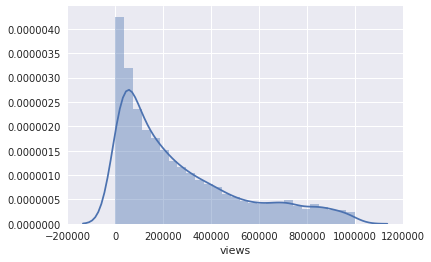

In [51]:
lessThan1Mill = views[views <= 1000000]

printCol(lessThan1Mill)

sns.distplot(lessThan1Mill);

### 6000 от всички 8000 видеа имат под 1M гледания.

## Да разгледаме зависимостта на гледанията с харесвания, нехаресвания и брой коментари

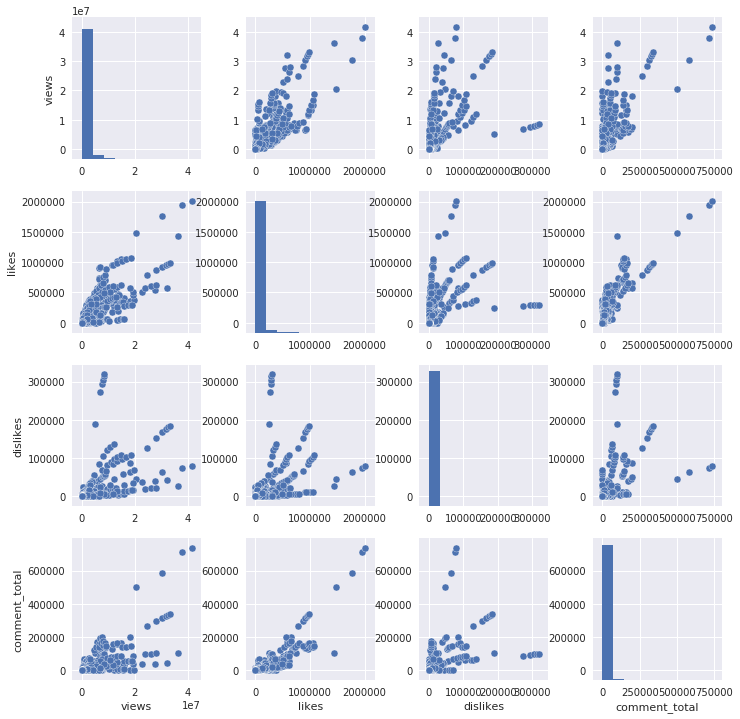

In [52]:
data = videos[["views", "likes", "dislikes", "comment_total"]]
sns.pairplot(data)

# Текстови колони
Имаме 3 колони със текст. Да видим какво можем да направим със всяка една от тях.

## Channel Title

In [53]:
channel_titles = videos.channel_title
print(channel_titles.value_counts())

Jimmy Kimmel Live                         40
Vox                                       40
First We Feast                            39
TheEllenShow                              38
vlogbrothers                              38
jacksfilms                                38
The Tonight Show Starring Jimmy Fallon    38
                                          ..
madison.com                                1
Thorn                                      1
Brainfeedermedia                           1
Rad Universe                               1
98DEMAKE                                   1
Vanderbilt Athletics                       1
Lutz Niggl                                 1
Name: channel_title, Length: 1230, dtype: int64


### Тук ще си позволя да копирам малко код от лекцията :)

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[[self.key]]


In [55]:
from sklearn.preprocessing import LabelBinarizer

class LabelBinarizerPipelineFriendly(LabelBinarizer):
    def fit(self, X, y=None):
        super().fit(X)

    def transform(self, X, y=None):
        return super().transform(X)

    def fit_transform(self, X, y=None):
        return super().fit(X).transform(X)

In [56]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

channel_title_pipeline = Pipeline([
    ('select', ItemSelector('channel_title')),
    ('encoder', LabelBinarizerPipelineFriendly()),
])

channel_title_union = FeatureUnion([
    ('channel', channel_title_pipeline)
])

channel_title_union.fit_transform(videos).shape

(7992, 1230)

### Ок, преработихме имената на каналите.. Какво още можем да направим??

## Tags

In [57]:
tags = videos.tags
print(tags.value_counts())

[none]                                                                                                                                                                                                                                                                                                                                                                                                                                                                      491
James Corden|The Late Late Show|Colbert|late night|late night show|Stephen Colbert|Comedy|monologue|comedian|impressions|celebrities|carpool|karaoke|CBS|Late Late Show|Corden|joke|jokes|funny|funny video|funny videos|humor|celebrity|celeb|hollywood|famous                                                                                                                                                                                                              37
The Late Show|Stephen Colbert|Colbert|Late Show|celebrities|late night|t

### Тук е малко по-интересно.
Имаме 2204 различни множества от тагове, като някои видеа (на един и същи канал най-вероятно) имат едни и същи тагове.

Тук може да сплитнем отделните тагове и да енкоднем най-често срещаните (по-късно евентуално). За сега няма да ползваме тази колона.

## Title

In [58]:
titles = videos.title
print(titles.value_counts())

Kellywise - SNL                                                                 8
IT PENNYWISE GLAM HALLOWEEN MAKEUP TUTORIAL                                     8
Tourist terrified by new glass walkway that cracks under weight                 8
Eminem Rips Donald Trump In BET Hip Hop Awards Freestyle Cypher                 8
My Response                                                                     7
Guns N' Roses Feat. PINK! - Patience (Msg, Nyc) 10.11.17 (P!NK)                 7
Did You Call My Girl!? | Anwar Jibawi                                           7
                                                                               ..
Stephen A. Smith: LaVar not worst sports parent ever | First Take | ESPN        1
Top 10 Dunks From The 2017 NBA Preseason                                        1
Capsela It's Motorized! - 1986 Commercial                                       1
Alexa: Guess My                                                                 1
Questions still 

### Тук е интересно, че някои заглавия се срещат по няколко пъти (евентуално дублирани данни)
### Нека използваме същия бинаризер (на български) за да екноднем и заглавията

In [59]:
titles_pipeline = Pipeline([
    ('select', ItemSelector('title')),
    ('encoder', LabelBinarizerPipelineFriendly()),
])

titles_union = FeatureUnion([
    ('titles', titles_pipeline)
])

titles_union.fit_transform(videos).shape

(7992, 2398)

# Да претренираме с обработените данни

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import FeatureUnion

feature_union = FeatureUnion([
    ('channel_title', channel_title_pipeline),
    ('title', titles_pipeline),
    ('likes', Pipeline([
        ('select', ItemSelector('likes')),
        ('scaler', StandardScaler()),
    ])),
    ('dislikes', Pipeline([
        ('select', ItemSelector('dislikes')),
        ('scaler', StandardScaler()),
    ])),
    ('comments', Pipeline([
        ('select', ItemSelector('comment_total')),
        ('scaler', StandardScaler()),
    ]))
])

model = Pipeline([
    ('union', feature_union),
    ('regression', LinearRegression())
])

data = videos[['channel_title', 'tags', 'title', 'likes', 'dislikes', 'comment_total']]

X_train, X_test, y_train, y_test = train_test_split(data, videos.views, random_state=0)

model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.988240510642
test score:  -3.27574655161e+23


# Epic Fail
## май овърфитва, не съм сигурен..
## Да изпробваме регуляризация

In [61]:
alpha = [0.001, 0.01, 0.1, 1, 10]

for a in alpha:
    print('alpha:', a)
    model = Pipeline([
        ('union', feature_union),
        ('regression', Ridge(alpha=a))
    ]).fit(X_train, y_train)
    print("train score:", model.score(X_train, y_train))
    print("test score: ", model.score(X_test, y_test))    
    print()

alpha: 0.001
train score: 0.990162497461
test score:  0.8988233425

alpha: 0.01
train score: 0.990122288343
test score:  0.900204003107

alpha: 0.1
train score: 0.988714549149
test score:  0.900778254639

alpha: 1
train score: 0.978603148407
test score:  0.881758177398

alpha: 10
train score: 0.902251757234
test score:  0.807271438012



### Вече съм доволен :)

# TL;DR;
## Baseline
### Linear Regression
train score: **0.730928079438** <br/>
test score:  **0.651118174035**

## Worst Score:
### Linear Regression
train score: **0.988240510642** <br/>
test score:  **-3.27574655161e+23**

## Best Score:
### Ridge(alpha=0.01)
train score: **0.990122288343** <br/>
test score:  **0.900204003107**